In [1]:
import numpy as np
norm = np.linalg.norm
sqrt = np.math.sqrt
dot = np.dot
array = np.array
import os

import matplotlib.pyplot as plt
import matplotlib.colors
#import scipy.linalg as la

In [2]:
def name_gen(n): return f"Output n={2**n}.txt"
def name_gen_old(n): return f"Distances2D_old Output n={2**n}.txt"
basepath = os.path.join(
    "Documents","programming","C# projects","fopra_absorb","UnityStuff","Logs","Distances2D"
)

In [579]:
def in_out_old(n, plot=True, cmap=plt.cm.get_cmap("PiYG",5), radius=12):
    path = os.path.join(os.path.expanduser("~"), *basepath.split("/"), name_gen_old(n))
    with open(path) as f:
        lines = f.readlines()

    coords = [line.split("; ") for line in lines]
        
    total = np.array([[tuple(map(float,coords[i][j][1:-1].split(", ")))[0] for j in range(len(coords))] for i in range(len(coords))]).T
    outer = np.array([[tuple(map(float,coords[i][j][1:-1].split(", ")))[1] for j in range(len(coords))] for i in range(len(coords))]).T
    inner = np.array([[tuple(map(float,coords[i][j][1:-1].split(", ")))[2] for j in range(len(coords))] for i in range(len(coords))]).T
    
    if plot:
        fig, axs = plt.subplots(ncols=3, figsize=(16,10), 
                               # gridspec_kw={'width_ratios': [1, 1]}
                               )
        axs[0].imshow(total, cmap=cmap, interpolation='none', extent=[-radius,radius,-radius,radius])
        axs[0].set_title("Total distances")
        axs[1].imshow(outer, cmap=cmap, interpolation='none', extent=[-radius,radius,-radius,radius])
        axs[1].set_title("Outer distances")
        axs[2].imshow(inner, cmap=cmap, interpolation='none', extent=[-radius,radius,-radius,radius])
        axs[2].set_title("Inner distances");
        fig.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax=axs, orientation='horizontal', fraction=.1, aspect=30, pad=0.1)
        return total, inner, outer, axs
    return total,inner,outer

In [37]:
def in_out(n, plot=True, cmap=plt.cm.get_cmap("PiYG",5), radius=12, margin=1.05):
    path = os.path.join(os.path.expanduser("~"), *basepath.split("/"), name_gen(n))
    with open(path) as f:
        lines = f.readlines()

    coords = [line.split("; ") for line in lines]
        
    inner = np.array([[tuple(map(float,coords[i][j][1:-1].split(", ")))[1] for j in range(len(coords))] for i in range(len(coords))]).T
    outer = np.array([[tuple(map(float,coords[i][j][1:-1].split(", ")))[0] for j in range(len(coords))] for i in range(len(coords))]).T
    distances = np.stack((outer, inner), axis=2)
    
    a = min(inner.min(), outer.min())
    b = max(inner.max(), outer.max())
    titles = ["Cell", "Sample"]

    if plot:
        fig, axs = plt.subplots(ncols=distances.shape[2], figsize=(16,10), gridspec_kw={'width_ratios': [1]*distances.shape[2]})
        for i in range(2):
            im = axs[i].imshow(distances[:,:,i], 
                        cmap=cmap, interpolation='none', 
                        origin="lower",
                        extent=[-radius*margin, radius*margin]*2,
                        vmin=a, vmax=b)
            axs[i].set_title(titles[i] + " distances")

        if cmap is None:
            cmap = plt.cm.get_cmap("viridis", 10)
        cmap.set_bad(color='red')
        #cmap.set_under(color="black")
        fig.colorbar(im, ax=axs, orientation='horizontal', fraction=.1, aspect=30, pad=0.1)
    
        return None, inner, outer, axs
    return None, inner,outer

In [535]:
unique_vals = np.unique(inner[~np.isnan(inner)])
value_count = unique_vals.shape[0]
zero_loc = np.argwhere(unique_vals==0).flatten()[0]

In [33]:
cmp = plt.cm.get_cmap("viridis", 10)
cmp.set_bad(color='red')
#cmp.set_under(color="black")

In [16]:
path = os.path.join(os.path.expanduser("~"), *basepath.split("/"), name_gen(n))

In [11]:
path

'/Users/Seve/Documents/programming/C# projects/fopra_absorb/UnityStuff/Logs/Distances2D/Output n=8.txt'

In [12]:
with open(path) as f:
    lines = f.readlines()

    coords = [line.split("; ") for line in lines]
        
    inner = np.array([
            [tuple(map(float,coords[i][j][1:-1].split(", ")))[1] 
             for j in range(len(coords))] for i in range(len(coords))]
            ).T
    outer = np.array([
            [tuple(map(float,coords[i][j][1:-1].split(", ")))[0] 
            for j in range(len(coords))] for i in range(len(coords))]
            ).T

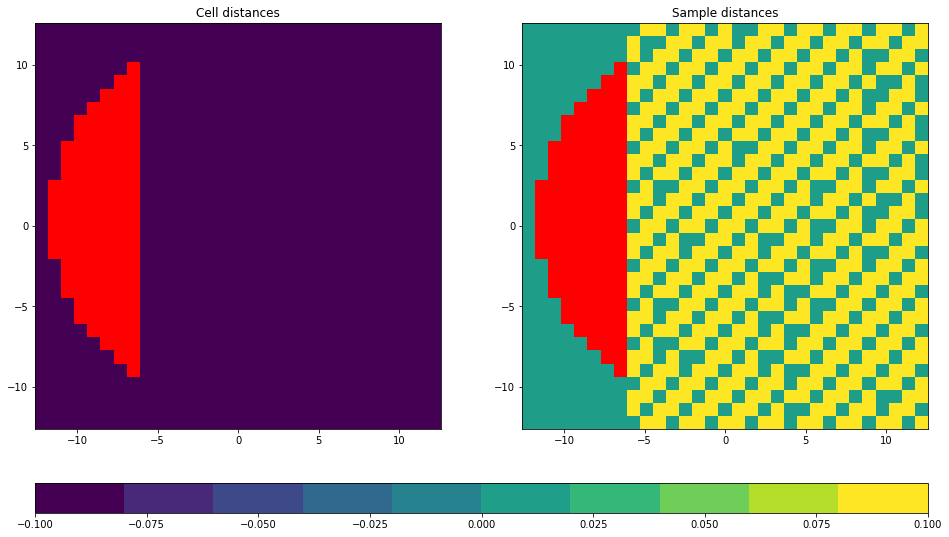

In [127]:
k = 5
total, inner, outer, axs = in_out(k, cmap=cmp)

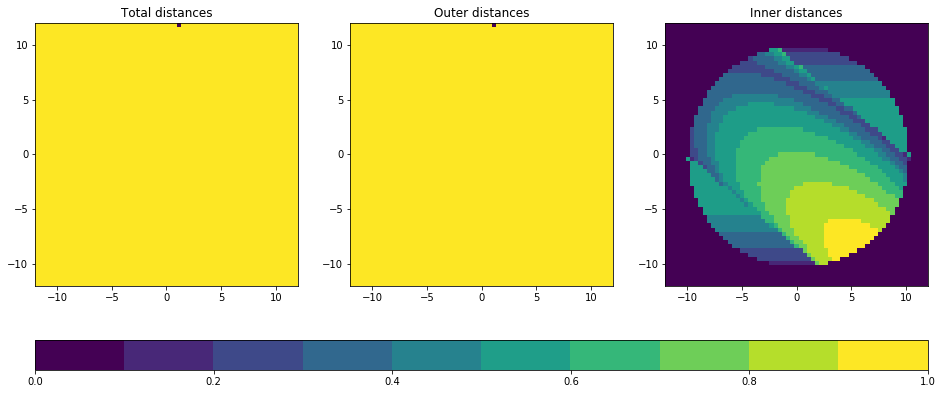

In [769]:
n = 6
total, inner, outer, axs = in_out_old(n, cmap=cmp)